# Project Overview and Goal

*The goal of this project is to predict whether or not an individual has a sleep disorder based on health, lifestyle, and sleep data. The dataset used in this project contains demographic and health data about individuals as well as sleep data, including whether or not they have a sleep disorder. Exploratory data analysis was performed on the dataset, then the dataset was cleaned and structured for modeling, and finally, models were created and evaluated in an attempt to build a model that could predict whether or not an individual has a sleep disorder based on demographic, health, and sleep information.*

# Importing Packages and Data

In [425]:
# Data manipulation
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Machine Learning

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
import pickle

# Model evaluation

from sklearn.metrics import recall_score, precision_score, accuracy_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score

# Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [426]:
# Setting pandas to show entire dataframe
pd.set_option('display.max_columns', None)

In [427]:
df_sleep = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Exploratory Data Analysis

## Discovery

In [428]:
# Initial inspection of the data
df_sleep.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


*The data contains information about the sleep and activity patterns of different individuals. It has demographic information, health and activity information, and sleep information.*

In [429]:
# Examining the size of the dataframe
df_sleep.shape

(374, 13)

*The data contains 13 columns with 374 rows.*

In [109]:
# Exploring data types and missing values
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


*The count of entries is equal to the non-null count for each row, indicating that there are no missing values in this dataset. The dataset  has a variety of data types including integers, floats, and strings (objects).*

In [430]:
# Looking at descriptive statistics
df_sleep.describe(include = 'all')

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
count,374.000000,374,374.000000,374,374.000000,374.000000,374.000000,374.000000,374,374,374.000000,374.000000,374
unique,NaN,2,NaN,11,NaN,NaN,NaN,NaN,4,25,NaN,NaN,3
top,NaN,Male,NaN,Nurse,NaN,NaN,NaN,NaN,Normal,130/85,NaN,NaN,None
freq,NaN,189,NaN,73,NaN,NaN,NaN,NaN,195,99,NaN,NaN,219
mean,187.500000,NaN,42.184492,NaN,7.132086,7.312834,59.171123,5.385027,NaN,NaN,70.165775,6816.844920,NaN
std,108.108742,NaN,8.673133,NaN,0.795657,1.196956,20.830804,1.774526,NaN,NaN,4.135676,1617.915679,NaN
min,1.000000,NaN,27.000000,NaN,5.800000,4.000000,30.000000,3.000000,NaN,NaN,65.000000,3000.000000,NaN
25%,94.250000,NaN,35.250000,NaN,6.400000,6.000000,45.000000,4.000000,NaN,NaN,68.000000,5600.000000,NaN
50%,187.500000,NaN,43.000000,NaN,7.200000,7.000000,60.000000,5.000000,NaN,NaN,70.000000,7000.000000,NaN
75%,280.750000,NaN,50.000000,NaN,7.800000,8.000000,75.000000,7.000000,NaN,NaN,72.000000,8000.000000,NaN


*Descriptive statistics can be useful in getting a general idea of the data.*

*Demographic information: The oldest person in the study is 59 years old, and the youngest is 27 years old. There is a mean age of 42 and a median age of 43. The most frequent gender represented is Male, with 189 observations. The most common occupation is Nurse, but there are 11 different occupations represented.*

*Health information: The maximum physical activity level is 90, and the minimum is 30, with a mean of 59 and a median of 60. The maximum stress level is 8 out of 10, and the minimum is 3, with a mean of 5.4 and a median of 5. Most people in this dataset are considered 'Normal' on the Body Mass Index. The maximum heart rate is 86 beats per minute, and the minimum is 65, with a mean of 70 and a median of 70 as well. The maximum number of daily steps is 10000, and the minimum is 3000, with a mean of 6817 and a median of 7000.*

*Sleep information: The mean sleep duration was 7.13 hours, with a maximum of 8.5 and a minimum of 5.8. The mean level of sleep quality was 7.3 out of 10, with a maximum of 9 and a minimum of 4. Two types of sleep disorders are present in the data, insomnia and sleep apnea. That being said, not having a sleep disorder is the most common among observations in this dataset.* 

In [28]:
# Looking at categories for categorical variables
print(df_sleep['Gender'].unique())
print(df_sleep['Occupation'].unique())
print(df_sleep['BMI Category'].unique())

['Male' 'Female']
['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
['Overweight' 'Normal' 'Obese' 'Normal Weight']


*There are 2 gender categories, 'male' and 'female'. There are 11 occupations represented, and 4 BMI categories, 'Overweight', 'Normal', 'Obese', and 'Normal Weight'. This appears to be an issue with the data, unless there is a difference between 'Normal' and 'Normal Weight'. It could be the case they need to be combined.*

In [111]:
# Examining 'Normal' vs. 'Normal weight'
df_sleep[df_sleep['BMI Category'].isin(['Normal', 'Normal Weight'])]

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,337,Female,54,Engineer,8.4,9,30,3,Normal,125/80,65,5000,None
337,338,Female,54,Engineer,8.4,9,30,3,Normal,125/80,65,5000,None
338,339,Female,54,Engineer,8.5,9,30,3,Normal,125/80,65,5000,None
341,342,Female,56,Doctor,8.2,9,90,3,Normal Weight,118/75,65,10000,None


*It looks as though observations with 'Normal' and those with 'Normal Weight' are similar, and should likley be one category. It also appears to be the case that this dataset contains duplicate entries with different Person IDs. It is possible that they are different individuals, but they have the exact same values for all of the other columns. This will be addressed during data cleaning.*

In [247]:
# Checking how many observations are in the dataset for each occupation
df_sleep['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

*Of the 11 occupations, 4 of them have 4 or fewer observations. Since there are so few observations in those categories, it may be worth combining them into their own cateogry, 'Other'. The most frequently occuring occupations are Nurse, Doctor, Engineer, and Lawyer.*

In [303]:
# Exploring how many people fall into each Gender category
df_sleep['Gender'].value_counts()

Male      189
Female    185
Name: Gender, dtype: int64

*There appears to be a roughly equal split between Male and Female observations.*

In [431]:
# Exploring how many observations fall into the three different sleep disorder categories
df_sleep['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

*Most people represented in the data do not have a sleep disorder. Of the people that do have a sleep disorder, it is roughly split between sleep apnea and insomnia.*

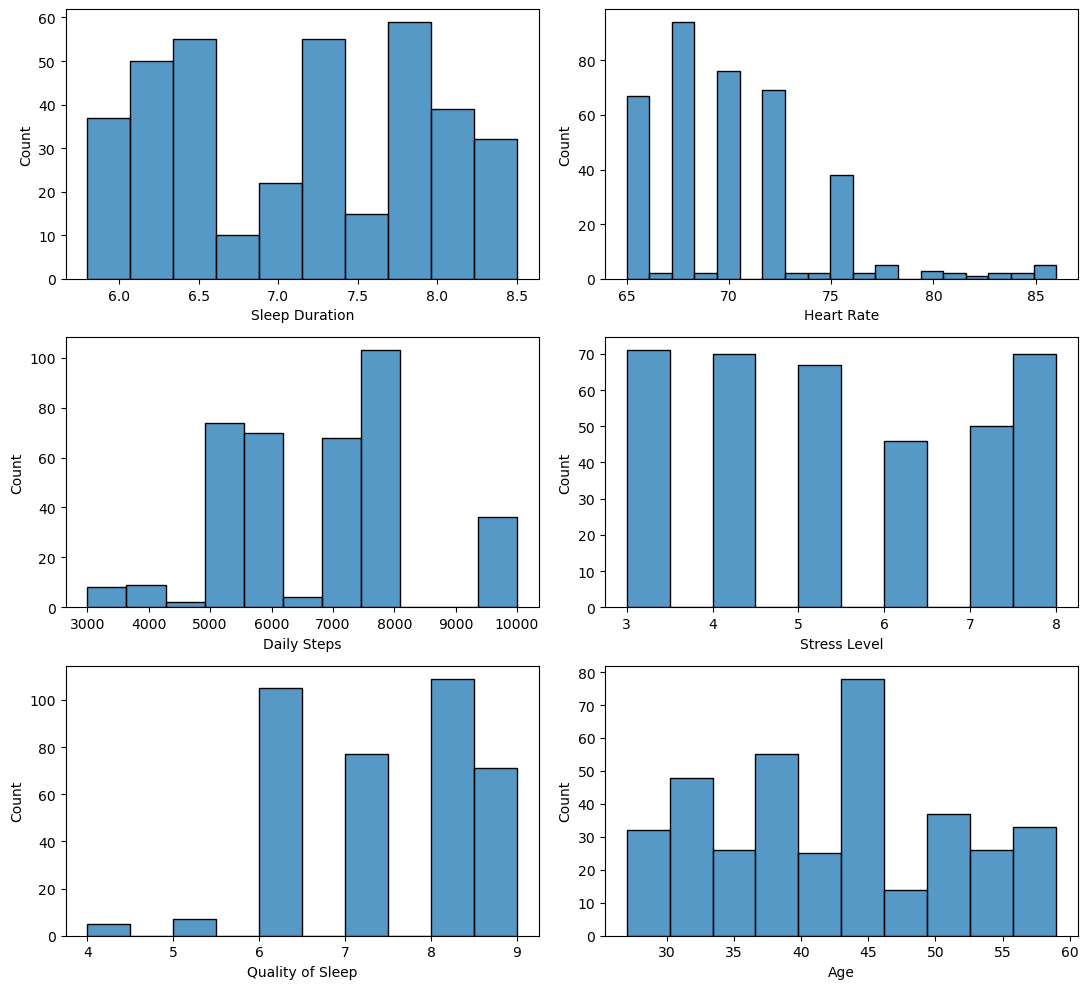

In [433]:
# Exploring the distributions for the different continuous variables
fig, axes = plt.subplots(3, 2, figsize = (11, 10))

sns.histplot(data = df_sleep, x = 'Sleep Duration', ax = axes[0,0])
sns.histplot(data = df_sleep, x = 'Heart Rate', ax = axes[0,1])
sns.histplot(data = df_sleep, x = 'Daily Steps', ax = axes[1,0])
sns.histplot(data = df_sleep, x = 'Stress Level', ax = axes[1,1])
sns.histplot(data = df_sleep, x = 'Quality of Sleep', ax = axes[2,0])
sns.histplot(data = df_sleep, x = 'Age', ax = axes[2,1])

plt.tight_layout()
plt.show()

*Sleep duration, heart rate, daily steps, and age appear to be approximately normally distributed. Stress level has a more uniform distribution, and quality of sleep almost has a bimodal distribution.*

## Cleaning and Structuring

In [258]:
# Double-checking for missing values
df_sleep.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

*As stated earlier, the data does not appear to contain any missing values in any of the rows.*

In [282]:
# It looks like the data contains duplicate rows with different Person IDs. 
df_sleep[df_sleep.duplicated(df_sleep.columns[1:]) == True]

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
11,12,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


*This table examines rows that have duplicated values in every column except the Person ID column. It seems unlikely that two different data points would have so many of the exact same values (including blood pressure, heart rate, daily steps, etc.). It could be the case that the observations are for the same person taken at different times, but there is no indication elsewhere that that is the case. There appear to be 242 rows that contain duplicate values.* 

In [283]:
# Removing rows with duplicated data
df_sleep_clean = df_sleep.drop_duplicates(df_sleep.columns[1:]).reset_index(drop = True)

*Normally, it would be best to check with the owner of the dataset to verify why these rows appear to be duplicated. If it were the case that these data points are from the same person, that would change our analyses because the observations would be dependent. For the purposes of this project, I assumed the observations were independent and removed the duplicate rows.*

In [284]:
# Replacing 'Normal Weight' with just 'Normal' in the BMI Category column for consistency
df_sleep_clean ['BMI Category'] = df_sleep_clean['BMI Category'].replace('Normal Weight', 'Normal')

*As mentioned earlier, it appears as though the 'Normal Weight' value in the BMI Category column was the same as 'Normal'. All values were change to 'Normal' for consistency.*

In [285]:
# Label encoding the BMI Category column
BMI_dict = {'Normal' : 1, 'Overweight' : 2, 'Obese' : 3}

df_sleep_clean['BMI_cat_codes'] = df_sleep_clean['BMI Category'].replace(BMI_dict)

*The machine learning models I plan to use cannot interpret strings, so the categorical data in the BMI Category column was label encoded with 1 representing 'Normal', 2 representing 'Overweight', and 3 representing 'Obsese'.*

In [286]:
# Splitting Blood Pressure into Systolic and Diastolic columns
df_sleep_clean['bp_split'] = df_sleep_clean['Blood Pressure'].str.split('/')

df_sleep_clean[['diastolic_bp', 'systolic_bp']] = pd.DataFrame(df_sleep_clean['bp_split'].tolist())

df_sleep_clean = df_sleep_clean.drop(['bp_split'], axis = 1)

df_sleep_clean['diastolic_bp'] = df_sleep_clean['diastolic_bp'].astype('int')
df_sleep_clean['systolic_bp'] = df_sleep_clean['systolic_bp'].astype('int')

*The Blood Pressure column contains string data with systolic and diastolic blood pressure values separated by a '/'. In order to use systolic and diastolic blood pressure in our analyses and modeling, the values were split into two separate columns and then formatted as integers, rather than strings.*

In [287]:
# Encoding the target variable (Sleep disorder)
df_sleep_clean['sleep_dis_present'] = np.where(df_sleep_clean['Sleep Disorder'] == 'None', 0, 1)

*Since the goal of this project is to classify whether or not an individual has a sleep disorder, the target variable needs to be binary. In order to acheive this, the Sleep Disorder column was encoded with 0 indicating the absence of sleep disorders and 1 indicating the presence of a sleep disorder (either sleep apnea or insomnia).*

In [288]:
# Creating an 'Other' category for occupations without many observations
df_sleep_clean['Occupation'] = np.where(
    df_sleep_clean['Occupation'].isin(
        ['Software Engineer', 'Scientist', 
         'Sales Representative', 'Manager']),
        'Other', df_sleep_clean['Occupation'])

*As mentioned previously, a few occupations in the Occupation column did not have very many values. These occupations were grouped together into an 'Other' column.*

In [289]:
# Dummy encoding Occupation and Gender
df_sleep_clean['Gender_cat'] = df_sleep_clean['Gender']
df_sleep_clean['Occupation_cat'] = df_sleep_clean['Occupation']

df_sleep_clean = pd.get_dummies(df_sleep_clean, columns = ['Gender_cat', 'Occupation_cat'], drop_first = True)

*The last two columns still containing categorical string data were dummy encoded so that they could be interpreted by the machine learning models used below.*

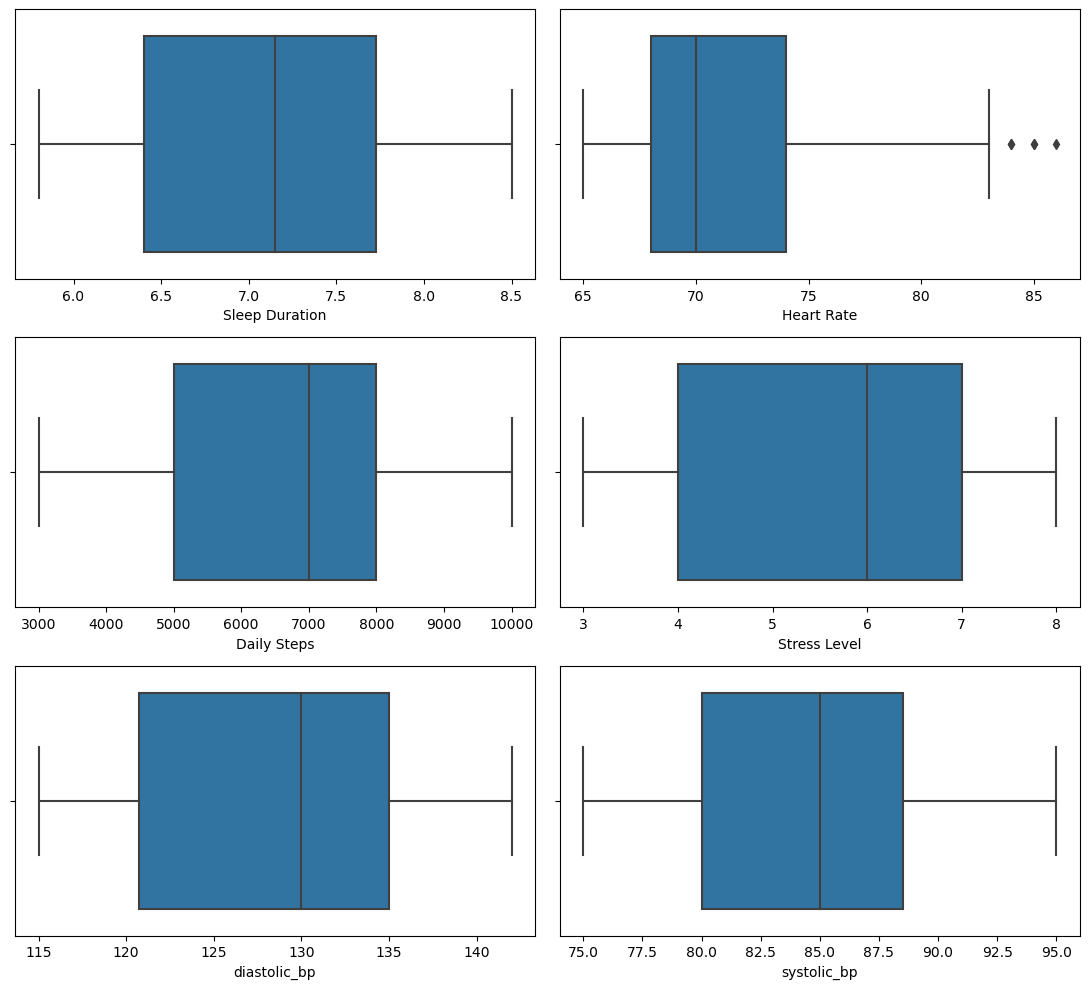

In [432]:
# Checking for outliers
fig, axes = plt.subplots(3, 2, figsize = (11, 10))

sns.boxplot(data = df_sleep_clean, x = 'Sleep Duration', ax = axes[0,0])
sns.boxplot(data = df_sleep_clean, x = 'Heart Rate', ax = axes[0,1])
sns.boxplot(data = df_sleep_clean, x = 'Daily Steps', ax = axes[1,0])
sns.boxplot(data = df_sleep_clean, x = 'Stress Level', ax = axes[1,1])
sns.boxplot(data = df_sleep_clean, x = 'diastolic_bp', ax = axes[2,0])
sns.boxplot(data = df_sleep_clean, x = 'systolic_bp', ax = axes[2,1])

plt.tight_layout()
plt.show()

*There appear to be outliers in the 'Heart Rate' column but none of the other columns.* 

In [295]:
# Further examining outliers in the Heart Rate column (values 1.5 times above the Inner Quartile Range)
hr_iqr = df_sleep_clean['Heart Rate'].quantile(.75) - df_sleep_clean['Heart Rate'].quantile(.25)

upper_limit = df_sleep_clean['Heart Rate'].quantile(.75) + 1.5 * hr_iqr

print('Upper Heart Rate Threshold: ' + str(upper_limit))

df_sleep_clean[df_sleep_clean['Heart Rate'] > upper_limit]

Upper Heart Rate Threshold: 83.0


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,BMI_cat_codes,diastolic_bp,systolic_bp,sleep_dis_present,Gender_cat_Male,Occupation_cat_Doctor,Occupation_cat_Engineer,Occupation_cat_Lawyer,Occupation_cat_Nurse,Occupation_cat_Other,Occupation_cat_Salesperson,Occupation_cat_Teacher
2,4,Male,28,Other,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,3,140,90,1,1,0,0,0,0,1,0,0
3,6,Male,28,Other,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,3,140,90,1,1,0,0,0,0,1,0,0
39,94,Male,35,Lawyer,7.4,7,60,5,Obese,135/88,84,3300,Sleep Apnea,3,135,88,1,1,0,0,1,0,0,0,0
57,146,Female,38,Lawyer,7.4,7,60,5,Obese,135/88,84,3300,Sleep Apnea,3,135,88,1,0,0,0,1,0,0,0,0
102,277,Male,49,Doctor,8.1,9,85,3,Obese,139/91,86,3700,Sleep Apnea,3,139,91,1,1,1,0,0,0,0,0,0


*All observations that contain outliers in the 'Heart Rate' column are also classified as 'Obsese' in the BMI Category column. This suggests that the 'Heart Rate' values are not erroneous and shouldn't need to be adjusted.*

## Validating Cleaning and Structuring

In [267]:
# Validating data cleaning to ensure all columns were properly created
df_sleep_clean.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,BMI_cat_codes,diastolic_bp,systolic_bp,sleep_dis_present,Gender_cat_Male,Occupation_cat_Doctor,Occupation_cat_Engineer,Occupation_cat_Lawyer,Occupation_cat_Nurse,Occupation_cat_Other,Occupation_cat_Salesperson,Occupation_cat_Teacher
0,1,Male,27,Other,6.1,6,42,6,Overweight,126/83,77,4200,None,2,126,83,0,1,0,0,0,0,1,0,0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,1,125,80,0,1,1,0,0,0,0,0,0
2,4,Male,28,Other,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,3,140,90,1,1,0,0,0,0,1,0,0
3,6,Male,28,Other,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,3,140,90,1,1,0,0,0,0,1,0,0
4,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia,3,140,90,1,1,0,0,0,0,0,0,1


*All of the columns were successfully added to the dataset. The categorical columns were properly encoded to be useful in modeling. The original categorical columns were left in the dataset for the purposes of performing statistical analysis on those columns.*

In [328]:
df_sleep_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Person ID                   132 non-null    int64  
 1   Gender                      132 non-null    object 
 2   Age                         132 non-null    int64  
 3   Occupation                  132 non-null    object 
 4   Sleep Duration              132 non-null    float64
 5   Quality of Sleep            132 non-null    int64  
 6   Physical Activity Level     132 non-null    int64  
 7   Stress Level                132 non-null    int64  
 8   BMI Category                132 non-null    object 
 9   Blood Pressure              132 non-null    object 
 10  Heart Rate                  132 non-null    int64  
 11  Daily Steps                 132 non-null    int64  
 12  Sleep Disorder              132 non-null    object 
 13  BMI_cat_codes               132 non

*All of the features that I plan to use for modeling are of the proper data type. None of the remaining rows have null values. The main concern I have is that there are not very many observations. This creates a risk that the models will overfit the data, and will not be useful on unseen data. It also means that there will likely not be enough data to have training, testing, and validation datasets. For this reason, I chose to only create training and testing sets. This impacts the ability to evaluate future performance of the models on unseen data. However, for the purposes of this project, the data seems to be sufficient.*

In [273]:
# Validating that BMI Category was encoded correctly
df_sleep_clean[['BMI Category', 'BMI_cat_codes']].value_counts()


BMI Category  BMI_cat_codes
Normal        1                73
Overweight    2                52
Obese         3                 7
dtype: int64

*The BMI Category column was properly adjusted, with the 'Normal Weight' values now represented in the 'Normal' group. The label encoding was also successful, the BMI Category groups are represented as ordinal numbers.*

In [272]:
# Validating that the target variable was encoded correctly
df_sleep_clean[['Sleep Disorder', 'sleep_dis_present']].value_counts()

Sleep Disorder  sleep_dis_present
None            0                    73
Sleep Apnea     1                    30
Insomnia        1                    29
dtype: int64

*The Sleep Disorder column was also properly encoded, with 'None' being encoded as 0, and 'Sleep Apnea' and 'Insomnia' being encoded as 1.*

In [271]:
# Validating that the 'Other' category in the occupation column was created
df_sleep_clean['Occupation'].value_counts()

Nurse          29
Doctor         24
Engineer       22
Teacher        15
Lawyer         15
Accountant     11
Salesperson     9
Other           7
Name: Occupation, dtype: int64

*The occupations with few observations were successfully aggregated into the 'Other' category. Certain occupations still do not have many observations, but this should be sufficient for my purposes.*

## Visualizations to examine data relationships

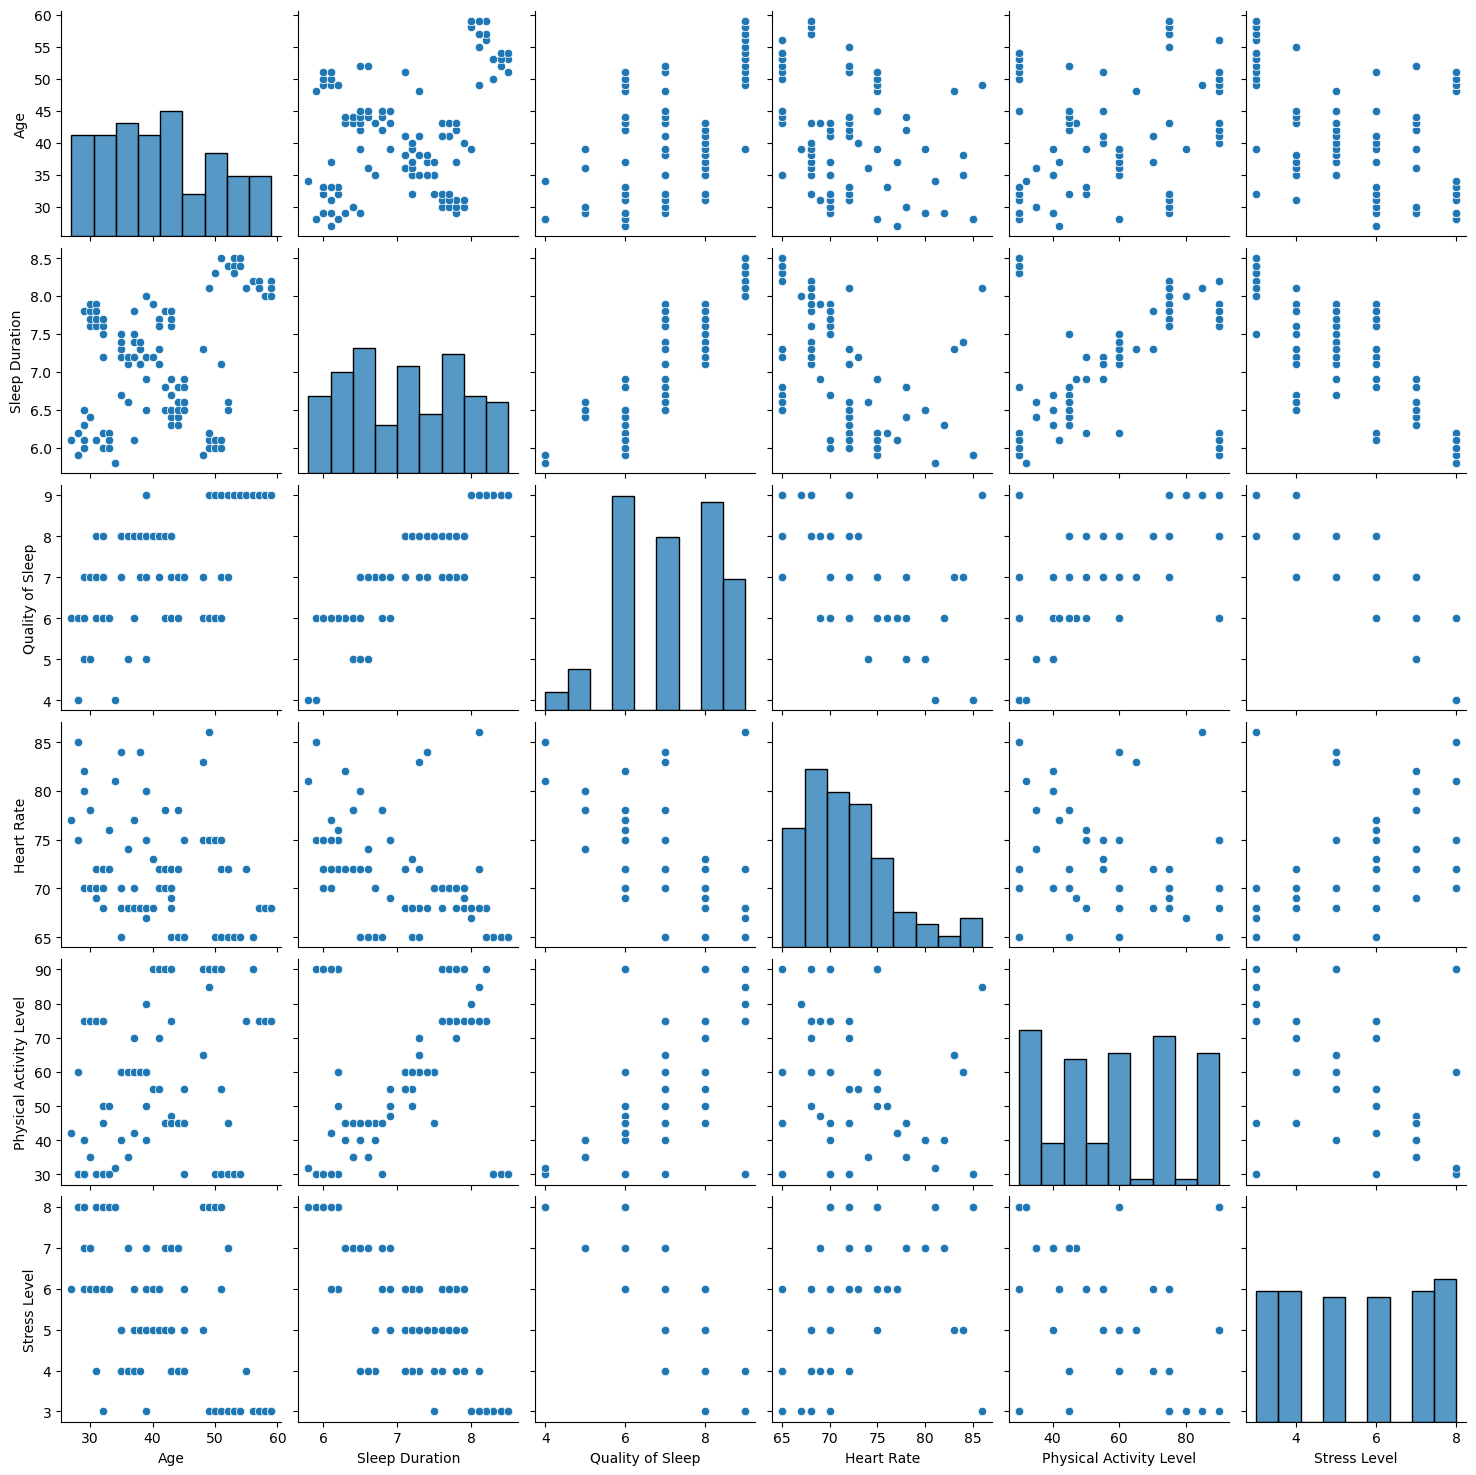

In [339]:
# Creating a scatterplot matrix
sns.pairplot(
    df_sleep_clean[['Age', 'Sleep Duration', 'Quality of Sleep', 'Heart Rate', 'Physical Activity Level',
                  'Stress Level']])

*This scatterplot matrix illusrates the relationships between different features. This can be useful to see relationsihps within the data and to assess model assumptions for the Logistic Regression model. The Logistic Regression model assumes that the features used in the model are not correlated with each other (no multicollinearity). This seems to generally be the case, however there do appear to be relationships between Sleep Duration and Physical Activity Level, between Sleep Duration and Heart Rate, and between Quality of Sleep and Stress Level. There may also be other weak correlations between other variables.*

# Modeling

### Preparing data for modeling

In [332]:
# Getting rid of unnecessary columns
df_sleep_model = df_sleep_clean.drop(
    ['Person ID', 'Gender', 'Occupation', 'Sleep Disorder', 'BMI Category', 'Blood Pressure'], axis = 1)
df_sleep_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         132 non-null    int64  
 1   Sleep Duration              132 non-null    float64
 2   Quality of Sleep            132 non-null    int64  
 3   Physical Activity Level     132 non-null    int64  
 4   Stress Level                132 non-null    int64  
 5   Heart Rate                  132 non-null    int64  
 6   Daily Steps                 132 non-null    int64  
 7   BMI_cat_codes               132 non-null    int64  
 8   diastolic_bp                132 non-null    int32  
 9   systolic_bp                 132 non-null    int32  
 10  sleep_dis_present           132 non-null    int32  
 11  Gender_cat_Male             132 non-null    uint8  
 12  Occupation_cat_Doctor       132 non-null    uint8  
 13  Occupation_cat_Engineer     132 non

*All columns still containing categorical string data were dropped. The remaining columns are all integers, floats, or other data types that can be used for modeling.*

In [369]:
# Splitting the data into datasets with the target variable and features
X = df_sleep_model.drop(['sleep_dis_present'], axis = 1)
y = df_sleep_model['sleep_dis_present']

*The X dataframe contains all of the features but not the target, and the Y dataframe/series contains the target variable (the presence of sleep disorders).*

## Logistic Regression

In [370]:
# Scaling the data for the Logistic Regression model
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = .3, stratify = y, random_state = 0)

*Logistic Regression models sometimes perform better with scaled data. For this reason, the data was scaled using `StandardScaler()` which standardizes features so they all have a mean of 0 and a standard deviation of 1. Training and test datasets were then created, with test sets having 30% of the data. The data was stratified based on the target variable, so the test and training sets had the same proportion of observations with and without sleep disorders.*

In [371]:
# Fitting a logistic regression model to the data
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [372]:
# Evaluating model results
y_pred = clf.predict(X_test)
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))
print('Precision: ' + str(precision_score(y_test, y_pred)))
print('Recall: ' + str(recall_score(y_test, y_pred)))
print('F1 score: ' + str(f1_score(y_test, y_pred)))
print('AUC score: ' + str(roc_auc_score(y_test, y_pred)))

Accuracy: 0.85
Precision: 0.875
Recall: 0.7777777777777778
F1 score: 0.823529411764706
AUC score: 0.8434343434343433


*This model performed decently well on the test data. It has an accuracy score of 0.85 which means it correctly predicted the presence or absence of sleep disorders 85% of the time. It has a precision score of 0.85 as well, meaning 85% of the positive predictions were correct. It has a recall score of 0.77, indicating that it correctly predicted 77% of the actual positives as positives. The model has an F1 score of 0.82, indicating that precision and recall scores were not incredibly different. The model has similar precision and recall. An AUC score of 0.84 indicates that the model performs pretty well across all classification thresholds. Since the AUC score is pretty far above 0.5, this indicates the model performs better than random chance.*

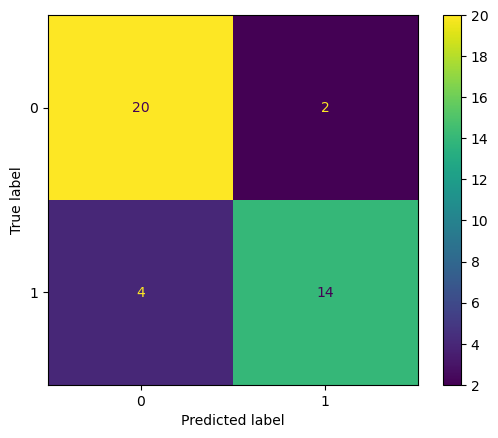

In [373]:
# Creating a confusion matrix for the results on the test data
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

disp.plot()

*The confusion matrix elaborates on the other evaluation metrics, illustrating the proportion of true positives, true negatives, false positives and false negatives. The model has a higher false positive rate than false negative rate, but does have more true positives than false positives and more true negatives than false negatives. Overall it had 6 incorrect predictions and 34 correct ones.*

<function matplotlib.pyplot.show(close=None, block=None)>

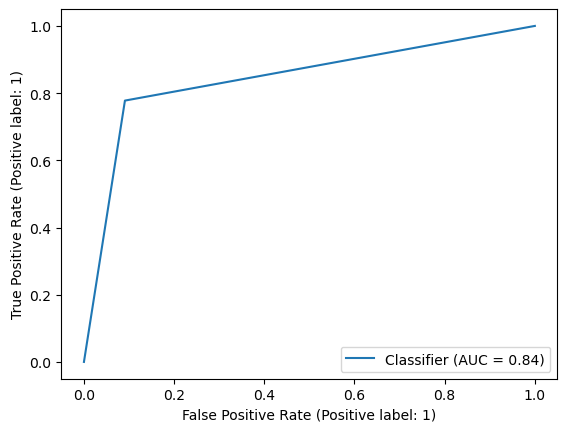

In [374]:
# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_pred)

plt.show

*The reciever operating characterstic curve shows the model's performance at different classification thresholds. A perfect model would have a true positive rate of 1 and a false positive rate of 0. Our model does have a low false positive rate and a high true positive rate at most thresholds, which is a good indication of model performance.*

In [375]:
# Viewing the beta coefficients for each feature used to predict the presence of a sleep disorder
pd.DataFrame(clf.coef_, columns = X.columns)

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,BMI_cat_codes,diastolic_bp,systolic_bp,Gender_cat_Male,Occupation_cat_Doctor,Occupation_cat_Engineer,Occupation_cat_Lawyer,Occupation_cat_Nurse,Occupation_cat_Other,Occupation_cat_Salesperson,Occupation_cat_Teacher
0,0.036008,0.534509,-0.493495,-0.365659,0.510579,0.651333,-0.028083,0.226326,1.114136,0.741865,0.075265,-0.30056,0.094253,-0.106716,-0.624391,-0.527665,-0.011814,0.229597


*This table shows the beta coefficients for each feature used to predict the presence of sleep disorders by the model. Features with beta coefficients furthest from 0 will have the most predictive power. For this model, those features include diastolic blood pressure (1.11), systolic blood pressure (0.74), and heart rate (0.65).*

## Random Forest

In [380]:
# Splitting data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 0)

*Modeling data was split into training and test sets once again. This time, the data was not scaled because decision tree models can handle data that is not scaled.*

In [453]:
# Creating a random forest model.
cv_params = {'max_depth' : [50,60,70],
            'max_samples' : [0.5,0.75,0.9],
            'max_features' : [5, 7, 9, None], 
            'min_samples_leaf' : [1,5,10],
            'min_samples_split' : [.005, .001],
            'n_estimators' : [50, 100]
            }

scoring = ('recall', 'precision', 'accuracy', 'f1')

rf = RandomForestClassifier(random_state = 0)

rf_cv = GridSearchCV(rf, cv_params, scoring = scoring, cv = 5, refit = 'f1')

*Grid search cross validation was used to test different values for the hyperparameters of the random forest model and return the best model. Max depth indicates how many levels each decision tree contains. Max samples specifies how much of the training data to use. Max features specifies how many features to use in each tree. Min samples leaf specifies a minimum number of samples a child node must contain to become a leaf node. Number of estimators specifies how many decision trees should be included in the ensemble.*

*Scoring metrics were specified, and F1 score was designated as the primary metric to evaluate model performance on. The random forest with the highest F1 score will be selected.*

In [454]:
# Fitting the model to the data
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [50, 60, 70],
                         'max_features': [5, 7, 9, None],
                         'max_samples': [0.5, 0.75, 0.9],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [0.005, 0.001],
                         'n_estimators': [50, 100]},
             refit='f1', scoring=('recall', 'precision', 'accuracy', 'f1'))

In [460]:
# Pickling the model to save it for future use
with open('sleep_rf_cv.pickle', 'wb') as to_write:
    pickle.dump(rf_cv, to_write)

*Pickling the model allows the model to be saved to a specified path where the model can be re-opened from in the future. This allows the model to be stored and ensures that the model doesn't have to be re-fit to the data each time the script is run.*

In [461]:
# Opening the pickled model
with open('sleep_rf_cv.pickle', 'rb') as to_read:
    rf_cv = pickle.load(to_read)

*If the model has already been run and pickled, it can be loaded from here.*

In [462]:
# Evaluating the model
y_pred = rf_cv.predict(X_test)


print(rf_cv.best_params_)
print(rf_cv.best_score_)
print()
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))
print('Precision: ' + str(precision_score(y_test, y_pred)))
print('Recall: ' + str(recall_score(y_test, y_pred)))
print('F1 score: ' + str(f1_score(y_test, y_pred)))


{'max_depth': 50, 'max_features': None, 'max_samples': 0.9, 'min_samples_leaf': 5, 'min_samples_split': 0.005, 'n_estimators': 100}
0.7943690296631474

Accuracy: 0.75
Precision: 0.8333333333333334
Recall: 0.5555555555555556
F1 score: 0.6666666666666667


*The best combination of parameters that led to the highest F1 score was a maximum depth of 50, using all features, samples of 90% of the training data, a minumum of 5 samples in a leaf node, and 100 individual estimators. The best F1 score was 0.79.*

*The model did not perform exceptionally well on the training data. The model has an accuracy score of 0.75, indicating that it correctly predicted 75% of the test data. It has a precision score of 0.83, indicating that 83% of the positive predictions made by the model were correct. It has a lower recall score of 0.55 indicating that it was only able to correctly predict 55% of the actual positive observations (observations where there was a sleep disorder). It has an F1 score of 0.66, reflecting that this model has a much higher precision score than recall score and neither are particularly high. The fact that the F1 scores are so different between the test and training data suggests that the model may be overfit to the training data.*

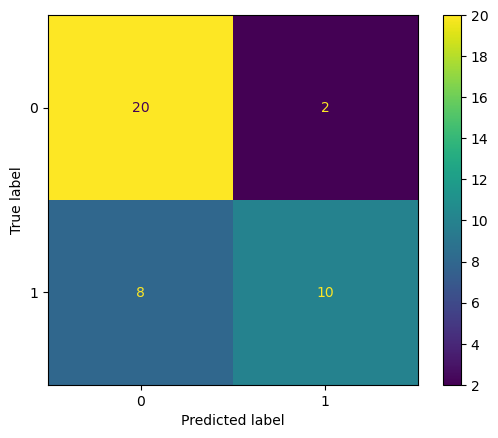

In [465]:
# Creating a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = rf_cv.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_cv.classes_)

disp.plot()

*The confusion matrix reflects what was observed in the scores for the other evaluation metrics. The model did a very good job predicting true negatives, and most of it's positive predictions were correct. However, it had a high rate of false negatives, and nearly half of all true positives were incorrect.*

*This indicates that this model might be a good fit if false positives were costly and more harmful than false negatives. That does not seem to be the case for our purposes, indicating that this model should be tuned/adjusted to see if its performance can be improved.*

In [463]:
# Tuning hyperparameters in an attempt to improve model performance
cv_params = {'max_depth' : [25, 30, 35],
            'max_samples' : [0.85, 0.9], 
            'min_samples_leaf' : [4, 5, 6],
            'min_samples_split' : [.005, .006],
            'n_estimators' : [80, 90]}

scoring = ('recall', 'precision', 'accuracy', 'f1')

rf = RandomForestClassifier(random_state = 0)

rf_cv1 = GridSearchCV(rf, cv_params, scoring = scoring, cv = 5, refit = 'f1')

*This model attempts to use different hyperparameter values (based on the values that were selected in the previous model) to improve model performance. The scoring metrics are the same.*

In [464]:
# Fitting the model to the data
rf_cv1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [25, 30, 35], 'max_samples': [0.85, 0.9],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [0.005, 0.006],
                         'n_estimators': [80, 90]},
             refit='f1', scoring=('recall', 'precision', 'accuracy', 'f1'))

In [466]:
# Pickling the model to save it for future use
with open('sleep_rf_cv_tuned.pickle', 'wb') as to_write:
    pickle.dump(rf_cv1, to_write)

In [467]:
#Opening the pickled model
with open('sleep_rf_cv_tuned.pickle', 'rb') as to_read:
    rf_cv1 = pickle.load(to_read)

In [470]:
# Evaluating the tuned model
y_pred = rf_cv1.predict(X_test)


print(rf_cv1.best_params_)
print(rf_cv1.best_score_)
print()
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))
print('Precision: ' + str(precision_score(y_test, y_pred)))
print('Recall: ' + str(recall_score(y_test, y_pred)))
print('F1 score: ' + str(f1_score(y_test, y_pred)))

{'max_depth': 25, 'max_samples': 0.85, 'min_samples_leaf': 5, 'min_samples_split': 0.005, 'n_estimators': 80}
0.789663147310206

Accuracy: 0.825
Precision: 0.9230769230769231
Recall: 0.6666666666666666
F1 score: 0.7741935483870968


*This version of the model used diffrent hyperparameter values than the previous model. The maximum depth of each tree was 25, it used 85% of the training data in each tree, and only 80 estimators. This model had an F1 score of 0.78.*

*This model performed better across the board. It has an accuracy score of 0.82, indicating that 82% of the model's predictions were correct. It has a precision score of 0.92, indicating that 92% of the true predictions were correct. It has a recall score of 0.66, which indicates it still had trouble identifying true positives again. It has an F1 score of 0.74, which is better, but still reflects the fact that the model had much higher precision than recall. The F1 scores for the training and testing data are more similar, indicating that the model is no longer overfit to the same degree.*

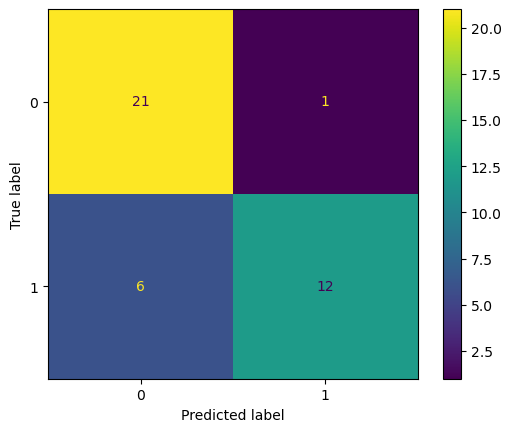

In [469]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels = rf_cv1.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_cv1.classes_)

disp.plot()

*This confusion matrix illustrates that this version of the model performed better, but still had similar issues. It still has a high rate of true negatives and more true positives than false positives, but again only correctly identified two thirds of the true positives.*

*It is still the case that this model might be useful if false positives were costly and more harmful than flase negatives. The model has very accurate positive predictions (precision) but doesn't do a great job predicting all positive values (poor recall).*

In [476]:
# Viewing which features were most important in predicting the presence of sleep disorders
tree_importances = pd.DataFrame(rf_cv1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], index=X.columns)

tree_importances = tree_importances.sort_values(by='gini_importance', ascending=False)
tree_importances.head(5)

,gini_importance
diastolic_bp,0.234782
systolic_bp,0.197163
BMI_cat_codes,0.105545
Heart Rate,0.097816
Stress Level,0.095097


*The most predictive features for this model were diastolic and systolic blood pressure, followed by BMI category, heart rate, and stress level. This corroborates the logistic regression model, which also found blood pressure to be a strong predictor of the presence of a sleep disorder or not.*

## Gradient Boosting

In [404]:
# Creating a Gradient Boosting model
cv_params = {'max_depth' : [8, 10, 12], 'min_child_weight' : [1, 2, 3], 
             'learning_rate' : [0.1, 0.2, 0.3],
            'n_estimators' : [40,50,60]}

xgb = XGBClassifier(objective = 'binary:logistic', random_state = 0)

xgb_cv = GridSearchCV(xgb, cv_params, scoring = scoring, cv = 5, refit = 'f1')

*The same training and test data was used to train and evaluate a gradient boosting model. Multiple values were tested for the different parameters to find the best combination. Learning rate specifies how much less weight the model should give to each subsequent tree in the final predictions. The classification type is binary logistic, since we have a binary target.*

In [405]:
# Fitting the model to the data
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [8, 10, 12],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': [40, 50, 60]},
             refit='f1', scoring=('recall', 'precision', 'accuracy', 'f1'))

In [409]:
# Pickling the model to save it for future use
with open('sleep_xgb_cv.pickle', 'wb') as to_write:
    pickle.dump(xgb_cv, to_write)

In [471]:
#Opening the pickled model
with open('sleep_xgb_cv.pickle', 'rb') as to_read:
    xgb_cv = pickle.load(to_read)

In [473]:
# Evaluating the model

y_pred = xgb_cv.predict(X_test)


print(xgb_cv.best_params_)
print(xgb_cv.best_score_)
print()
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))
print('Precision: ' + str(precision_score(y_test, y_pred)))
print('Recall: ' + str(recall_score(y_test, y_pred)))
print('F1 score: ' + str(f1_score(y_test, y_pred)))

{'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 40}
0.8027350427350427

Accuracy: 0.75
Precision: 0.8333333333333334
Recall: 0.5555555555555556
F1 score: 0.6666666666666667


*The best combination of paramters was a learning rate of 0.1, a max depth of 8 levels for each tree, a minimum child weight of 3, and 40 individual estimators. The best F1 score was 0.80.*

*This model also did not perform exceptionally well on the test data. It performed similarly to the first random forest model. It also has a much higher precision score than recall score. The difference between the F1 scores on the training and test data indicates that the model may be overfit to the training data.*

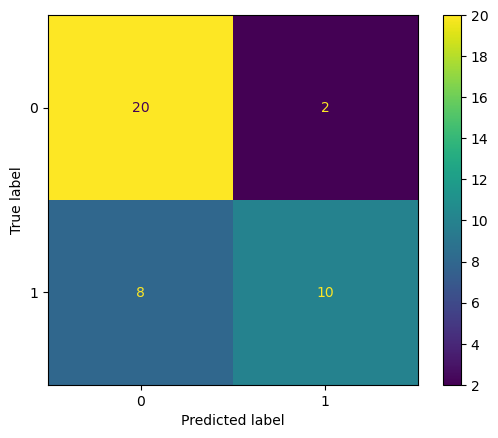

In [474]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels = xgb_cv.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = xgb_cv.classes_)

disp.plot()

*This confusion matrix is the exact same as the confusion matrix for the first random forest model. This model did better predicting true negatives and generally was correct with positive predictions. It did a poor job identifying actual positives, and had a high rate of false negatives.*

In [487]:
# Tuing hyperparameters in an attempt to improve model performance
cv_params = {'max_depth' : [10, 11, 12], 'min_child_weight' : [3, 4, 5], 
             'learning_rate' : [0.1],
            'n_estimators' : [25, 30, 35]}

xgb = XGBClassifier(objective = 'binary:logistic', random_state = 0)

xgb_cv1 = GridSearchCV(xgb, cv_params, scoring = scoring, cv = 5, refit = 'f1')

*Hyperparameters were tuned based on the parameters used in the first model in an attempt to improve model performance.*

In [488]:
xgb_cv1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [10, 11, 12],
                         'min_child_weight': [3, 4, 5],
                         'n_estimators': [25, 30, 35]},
             refit='f1', scoring=('recall', 'precision', 'accuracy', 'f1'))

In [489]:
# Pickling the model to save it for future use
with open('sleep_xgb_cv_tuned.pickle', 'wb') as to_write:
    pickle.dump(xgb_cv1, to_write)

In [490]:
#Opening the pickled model
with open('sleep_xgb_cv_tuned.pickle', 'rb') as to_read:
    xgb_cv1 = pickle.load(to_read)

In [491]:
# Evaluating the tuned model
y_pred = xgb_cv1.predict(X_test)


print(xgb_cv1.best_params_)
print(xgb_cv1.best_score_)
print()
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))
print('Precision: ' + str(precision_score(y_test, y_pred)))
print('Recall: ' + str(recall_score(y_test, y_pred)))
print('F1 score: ' + str(f1_score(y_test, y_pred)))

{'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 4, 'n_estimators': 35}
0.8100449842555106

Accuracy: 0.775
Precision: 0.9090909090909091
Recall: 0.5555555555555556
F1 score: 0.6896551724137931


*The tuned model used the same learning rate and maximum depth. It used a higher minimum child weight and fewer estimators. It had an F1 score of 0.81.*

*This model only performed slightly better than the other model, with an improved accuracy score of 0.77, an improved precision score of 0.91, a comparable recall score of 0.55, and a slightly better F1 score of 0.68. The F1 scores between the training and test data are quite different still, suggesting that the model may still be overfit to the training data.*

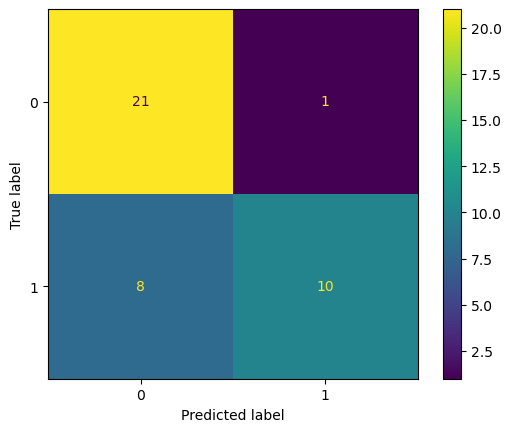

In [492]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels = xgb_cv1.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = xgb_cv1.classes_)

disp.plot()

*Even though this model performed slightly better, it still had difficulty correctly identifying actual positives. It did perform better in terms of correct positive predictions. There are still a high proportion of false negatives. Simlar to the random forest model, this model could be useful if the cost of a true positive was higher and the harm of a false negative was not as great, since it has such high precision, despite having poor recall.*

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

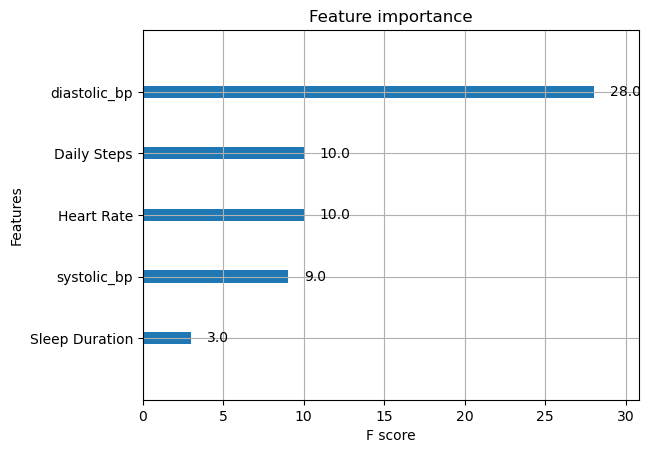

In [494]:
# Viewing the most predictive features from the Gradient Boosting model
plot_importance(xgb_cv1.best_estimator_, max_num_features = 5)

*This plot illustartes that the most important features used by the gradient boosting model were diastolic blood pressure, daily steps, heart rate, systolic blood pressure, and sleep duration. Once again, diastolic blood pressure was the most predictive feature, and heart rate and systolic blood pressure were among the top 5.*

# Conclusions

*The results of these models should be interpreted cautiously, since there are inherent limitations with the data used to create the models. Namely, there are not many observations in the dataset that was used to train the models. This could create issues because the models might be overfit to the small selection of data in the dataset. There also were not many instances of certain features (only 7 observations fell into the 'Obese' BMI category), making it difficult to generalize these results. Furthermore, since there was not much data, I neglected to set aside unseen test data to evaluate future model performance. Since these models saw all of the data, the final version of each model cannot be tested on unseen data, further supporting the potential that these models are overfit to this data.*

*Keeping the limitations of the data in mind, these results do seem to suggest that certain specific factors play a role in predicting the presence of sleep disorders. Namely, blood pressure (especially diastolic blood pressure) and heart rate. While not entirely conclusive, this information could be useful in identifying and predicting sleep disorders and the relationship between blood pressure, heart rate, and sleep disorders could be explored further to gain insight into the causes, symptoms, or treatment of sleep disorders.*